# Wikipedia vs Gigaword vectors
wiki 15% = giga 100% in terms of token count, and for comparison we've got wiki 50%

In [2]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


ids are [46, 47, 48, 49]
ids are [97, 107, 117, 127]
ids are [21, 22, 23, 24]
6000 6000 12


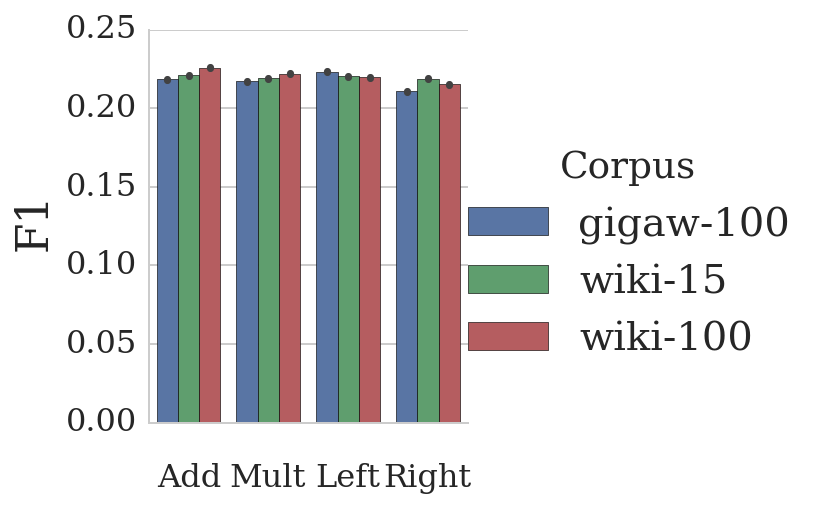

In [32]:
exp_ids, scores, folds = [], [], []
d1 = {'vectors__unlabelled_percentage': 15, 
     'vectors__unlabelled': 'wiki',
     'vectors__rep':0,
     'document_features_tr':'J+N+AN+NN',
     'document_features_ev':'AN+NN',}
d2 = {'noise': 0.0,
      'document_features_ev': 'AN+NN', 
      'document_features_tr': 'J+N+AN+NN',
      'vectors__rep': 0, 
      'decode_handler': 'SignifiedOnlyFeatureHandler', 
      'vectors__unlabelled_percentage': 100, 
      'k': 3, 
      'vectors__unlabelled': 'wiki', 
      'vectors__algorithm': 'word2vec'}

d3 = {'noise': 0.0,
      'document_features_ev': 'AN+NN', 
      'document_features_tr': 'J+N+AN+NN',
      'vectors__rep': 0, 
      'decode_handler': 'SignifiedOnlyFeatureHandler', 
      'vectors__unlabelled_percentage': 100, 
      'k': 3, 
      'vectors__unlabelled': 'gigaw', 
      'vectors__algorithm': 'word2vec'}

for d in [d1, d2, d3]:
    experiments = Experiment.objects.filter(**d).\
                       exclude(vectors__composer__in=['Verb', 'CopyObj'])
    ids = [e.id for e in experiments if e.entries_of is None]
    print('ids are', ids)
    tmp_scores, tmp_folds = get_cv_scores_many_experiment(ids)
    exp_ids.extend(ids)
    scores.extend(tmp_scores)
    folds.extend(tmp_folds)

cv_folds = get_cv_fold_count(exp_ids)
names = []
for id in exp_ids:
    exp = Experiment.objects.get(id=id)
    names.append('%s-%d'%(exp.vectors.unlabelled, exp.vectors.unlabelled_percentage))
names = np.repeat(names, cv_folds)
composers = get_vectors_field(exp_ids, 'composer')


print(len(names), len(scores), len(cv_folds))

df = pd.DataFrame({'F1': scores,
                   'cvfold': folds,
                   'Corpus': names,
                   'Composer': composers})

plt.rcParams['lines.linewidth'] = 2
df[df.cvfold==0].to_html('tmp.html')
order = ['gigaw-100', 'wiki-15', 'wiki-100']
grid = sns.factorplot(hue='Corpus', y='F1', data=df, x='Composer',
                      kind='bar', sharey=True, hue_order=order);
# sns.boxplot(df.F1, df.Corpus)
grid.axes[0][0].set(xlabel='')
plt.savefig('plot-wiki-vs-gigaw.pdf', format='pdf', dpi=300)